# CNN

#### Index<a name="index"></a>
1. [Import packages](#imports)
2. [Load data](#loadData)
3. [Classification](#classification)
    1. [Uniform distribution for non-clusters](#uni)
    2. [Functional distribution for non-clusters](#func)

## 1. Import packages<a name="imports"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#### Aestetic settings

In [2]:
%matplotlib inline

sns.set(font_scale=1.3, style="ticks")

## 2. Load data<a name="loadData"></a>

In [3]:
number_clusters = 1229

In [4]:
# train positive samples
true_clusters_2d_hist_file = f'../data/true_clusters_2d_hist_{number_clusters}.npy'
true_clusters_2d_hist = np.load(true_clusters_2d_hist_file, allow_pickle=True)
   
# validation nagative samples (y = 0) - real samples from DBSCAN
val_clusters_2d_hist_file = f'../data/matrix_false_nonclusters.npy'
val_clusters_2d_hist = np.load(val_clusters_2d_hist_file, allow_pickle=True)

x_val = val_clusters_2d_hist.reshape(-1,20,20,1)
y_val = np.zeros_like(val_clusters_2d_hist[:, 0])

In [5]:
print(np.shape(true_clusters_2d_hist))
print(np.shape(val_clusters_2d_hist))

(1229, 400)
(32, 400)


## 3. Classification<a name="classification"></a>

In [6]:
def plot_confusion_matrix(y_true, y_pred, title, target_names, normalize=True):
    cm = confusion_matrix(y_true, y_pred, labels=target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#     print(cm)

    annot = np.around(cm, 2)
    
    dict_label_to_real = {0:'False Cluster', 1:'True Cluster'}
    target_names = np.vectorize(dict_label_to_real.get)(target_names)

    fig, ax = plt.subplots(figsize=(7, 5.5))
    sns.heatmap(cm, xticklabels=target_names,
                yticklabels=target_names, cmap='Blues',
                annot=annot, lw=0.5, vmin=0, vmax=1, 
                annot_kws={"size": 20})

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_aspect('equal')
    plt.title(title)
    plt.show()

### With uniform distribution for non-clusters<a name="uni"></a>
```python
n = int(random.uniform (30, 500)) ## number of stars
gm = np.random.uniform (8, 18, size = n) ## Gaia G magnitude
cl = np.random.uniform (0, 5, size = n) ## color (Gaia Bp-Rp)
```

In [7]:
non_clusters_2d_hist_file = f'../data/unif_non_clusters_2d_hist_{number_clusters}.npy'
non_clusters_2d_hist = np.load(non_clusters_2d_hist_file, allow_pickle=True)

all_clusters = np.concatenate((true_clusters_2d_hist, 
                               non_clusters_2d_hist))
true_labels = np.concatenate((np.ones_like(true_clusters_2d_hist[:, 0]), 
                              np.zeros_like(non_clusters_2d_hist[:, 0])))

x_train, x_test, y_train, y_test = train_test_split(all_clusters, true_labels)
x_train = x_train.reshape(-1,20,20,1)
x_test = x_test.reshape(-1,20,20,1)

In [8]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(20,20,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/3
58/58 [==============================] - 3s 44ms/step - loss: 0.3873 - accuracy: 0.8106 - val_loss: 0.1469 - val_accuracy: 1.0000
Epoch 2/3
58/58 [==============================] - 2s 35ms/step - loss: 0.0334 - accuracy: 0.9978 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3/3
58/58 [==============================] - 2s 28ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 1.0000
Accuracy:  1.0
[[324   0]
 [  0 291]]


#### Test set

Normalized confusion matrix


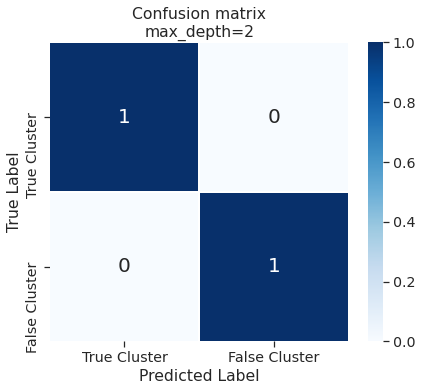

In [9]:
plot_confusion_matrix(y_test, y_pred, 'Confusion matrix\nmax_depth=2', [1, 0])

#### Validation set

Accuracy:  0.03125
Confusion matrix, without normalization


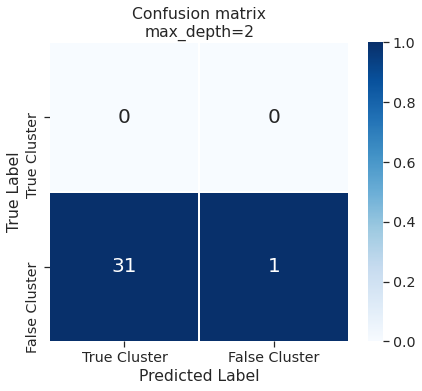

In [10]:
y_pred_val = model.predict(x_val)
y_pred_val = (y_pred_val > 0.5).astype(int)

print("Accuracy: ", accuracy_score(y_val, y_pred_val))
plot_confusion_matrix(y_val, y_pred_val, 'Confusion matrix\nmax_depth=2', [1, 0], normalize=False)

### With functional distribution for non-clusters<a name="func"></a>
```python
n = int(random.uniform (30, 500)) ## number of stars
gm = [np.arcsin(i) + random.gauss(1, 0.5) for i in np.linspace(-1, 1, n)] ## Gaia G magnitude
cl = np.linspace(-1, 1, n) ## color (Gaia Bp-Rp)
```

In [11]:
non_clusters_2d_hist_file = f'../data/func_non_clusters_2d_hist_{number_clusters}.npy'
non_clusters_2d_hist = np.load(non_clusters_2d_hist_file, allow_pickle=True)

all_clusters = np.concatenate((true_clusters_2d_hist, 
                               non_clusters_2d_hist))
true_labels = np.concatenate((np.ones_like(true_clusters_2d_hist[:, 0]), 
                              np.zeros_like(non_clusters_2d_hist[:, 0])))

x_train, x_test, y_train, y_test = train_test_split(all_clusters, true_labels)
x_train = x_train.reshape(-1,20,20,1)
x_test = x_test.reshape(-1,20,20,1)

In [12]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(20,20,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/3
58/58 [==============================] - 2s 28ms/step - loss: 0.1496 - accuracy: 0.9582 - val_loss: 0.0253 - val_accuracy: 0.9919
Epoch 2/3
58/58 [==============================] - 2s 39ms/step - loss: 0.0271 - accuracy: 0.9951 - val_loss: 0.0135 - val_accuracy: 0.9935
Epoch 3/3
58/58 [==============================] - 2s 43ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0041 - val_accuracy: 0.9984
Accuracy:  0.9983739837398374
[[315   0]
 [  1 299]]


#### Test set

Normalized confusion matrix


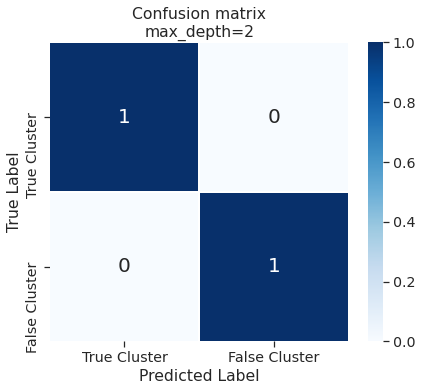

In [13]:
plot_confusion_matrix(y_test, y_pred, 'Confusion matrix\nmax_depth=2', [1, 0])

#### Validation set

Accuracy:  0.15625
Confusion matrix, without normalization


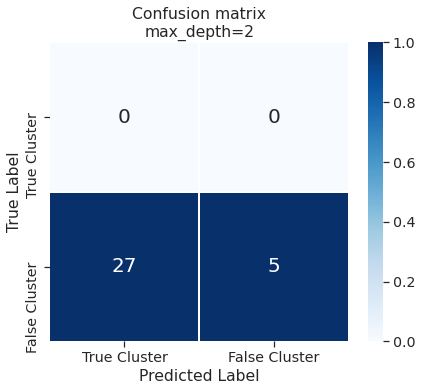

In [14]:
y_pred_val = model.predict(x_val)
y_pred_val = (y_pred_val > 0.5).astype(int)

print("Accuracy: ", accuracy_score(y_val, y_pred_val))
plot_confusion_matrix(y_val, y_pred_val, 'Confusion matrix\nmax_depth=2', [1, 0], normalize=False)

Go to [Index](#index)